# Исследование маркетинговой стратегии развлекательного приложения Procrastinate Pro+

Мы являемся маркетинговым аналитиком развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

## Загрузка данных и подготовка их к анализу

Импортируем все необходимые для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Изучаем данные о каждом датасете

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Изменение типов данных

В ходе изучения общей информации о данных датасетах, мы выявили, что в некоторых столбцах типы данных не соответствуют представленным в них значениям. К таким столбцам относятся `Session Start` и	`Session End` из датасета visits; ` Event Dt` из датасета orders; `dt` из датасета costs. Во всех этих столбцах предсталены данные о дате и времени, но тип данных в них object. Необходимо заменить тип данных object на datetime.

In [9]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверим, что получилось. Вывыдем ещё раз общую информацию о датасетах.

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Изменение названий столбцов, приведение их к нижнему регистру

Приведем названия столбцов к нижнему регистру и к snake_case

In [13]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [14]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [15]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [16]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [17]:
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

In [18]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

#### Обработка пропусков

Изучим пропущенные значения в столбцах. Определим, в каких столбцах есть пропуски, и их количество

In [19]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [20]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [21]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

В данных датафреймах нет пропусков. Переходим к следующему этапу предобработки данных.

#### Обработка дубликатов

Проверим наличие явных дубликатов во в каждом датафрейме

In [22]:
visits.duplicated().sum()

0

In [23]:
orders.duplicated().sum()

0

In [24]:
costs.duplicated().sum()

0

Ни в одном датасете явные дубликаты не обнаружены

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для создания профилей пользователей, для подсчета Retention Rate, для подсчета конверсии, для подсчета LTV, для сглаживания данных, для построения графика Retention Rate, для построения графика конверсии, для визуализации LTV и ROI.

Функция для создания пользовательских профилей

In [25]:
def get_profiles(visits, orders, events, costs, event_names=[]):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

Функция для расчёта удержания

In [26]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    dimensions = ['payer'] + dimensions
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

Функция для расчёта конверсии

In [27]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

   
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

 
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

   
    if 'cohort' in dimensions: 
        dimensions = []

 
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

   
    return result_raw, result_grouped, result_in_time 

Функция для расчёта LTV и ROI

In [28]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
  
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
 
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']


    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw, 
        result_grouped, 
        result_in_time, 
        roi_grouped, 
        roi_in_time,  
    ) 

Функция для сглаживания фрейма

In [29]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Функция для визуализации удержания

In [30]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

  
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для визуализации конверсии

In [31]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


Функция для визуализации LTV и ROI

In [32]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

#### Составление профиля пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [33]:
events=None
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [34]:
min_date = profiles['dt'].min()
print('Минимальная дата привлечения пользователей:', min_date)
max_date = profiles['dt'].max()
print('Максимальная дата привлечения пользователей:',max_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


#### Исследование стран, из которых пользователи приходят в приложение

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
region = profiles.pivot_table(index='region', values='user_id', aggfunc='count')
region_payer = profiles.query('payer==True').pivot_table(index='region', values='user_id', aggfunc='count')
region['share'] = region_payer/region
region = region.style.format({'share':'{:0.2%}'})
region

,user_id,share
region,,
France,17450,3.80%
Germany,14981,4.11%
UK,17575,3.98%
United States,100002,6.90%


In [36]:
region_payer

,user_id
region,
France,663
Germany,616
UK,700
United States,6902


Пользователи приходят из 4 стран: Франции, Германии, Великобритании и США. Большего всего платящих пользователей приходится на США - 6.9%

#### Исследование устройств, с которых пользователи используют приложение

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [37]:
device = profiles.pivot_table(index='device', values='user_id', aggfunc='count')
device_payer = profiles.query('payer==True').pivot_table(index='device', values='user_id', aggfunc='count')
device['share'] = device_payer/device
device = device.style.format({'share':'{:0.2%}'})
device

,user_id,share
device,,
Android,35032,5.85%
Mac,30042,6.36%
PC,30455,5.05%
iPhone,54479,6.21%


In [38]:
device_payer

,user_id
device,
Android,2050
Mac,1912
PC,1537
iPhone,3382


Клиенты пользуются такими устройствами, как Android, Mac, PC, iPhone. По количеству пользователей преобладают iPhone и Android, однако доля платящих пользователей выше всего на Mac и iPhone.

#### Исследование каналов привлечения, из которых приходят пользователи

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [39]:
channel = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channel_payer = profiles.query('payer==True').pivot_table(index='channel', values='user_id', aggfunc='count')
channel['share'] = channel_payer/channel
channel = channel.style.format({'share':'{:0.2%}'})
channel

,user_id,share
channel,,
AdNonSense,3880,11.34%
FaceBoom,29144,12.20%
LeapBob,8553,3.06%
MediaTornado,4364,3.57%
OppleCreativeMedia,8605,2.71%
RocketSuperAds,4448,7.91%
TipTop,19561,9.60%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%


In [40]:
channel_payer

,user_id
channel,
AdNonSense,440
FaceBoom,3557
LeapBob,262
MediaTornado,156
OppleCreativeMedia,233
RocketSuperAds,352
TipTop,1878
WahooNetBanner,453
YRabbit,165


Больше всего платящих пользователей пришло из таких каналов, как FaceBoom и TipTop. Самая высокая доля платящих пользователей пришла из таких каналов, как FaceBoom, AdNonSense и lambdaMediaAds. На TipTop доля платящих пользователей меньше, чем на выше упомянутых.

### Маркетинг

#### Расчёт общей суммы расходов на маркетинг

In [41]:
costs_total = costs['costs'].sum().round()
print('Общая сумма расходов на маркетинг составляет:',costs_total)

Общая сумма расходов на маркетинг составляет: 105497.0


#### Распределение трат по рекламным источникам

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [42]:
channel_costs = costs.pivot_table(index='channel', values = 'costs', aggfunc='sum')
channel_costs

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


Больше всего денег потрачено на такие источники, как TipTop и FaceBoom.

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на графике.

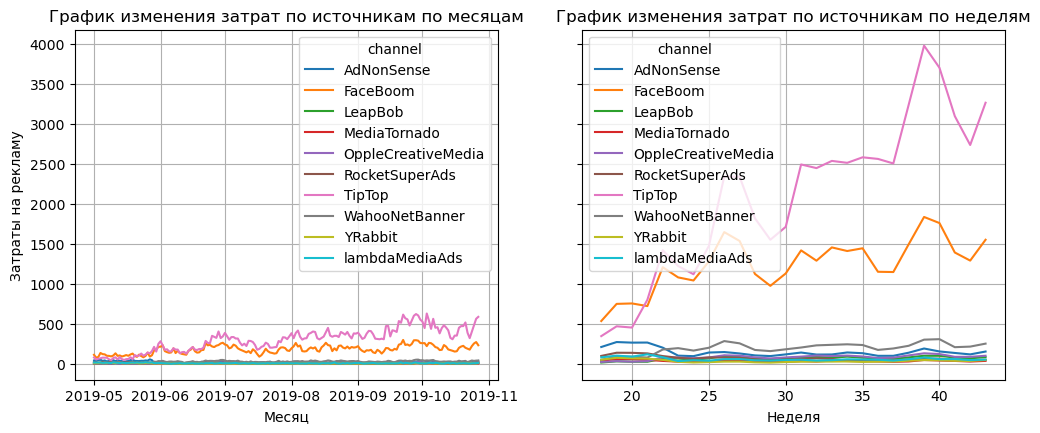

In [43]:
ax1 = plt.subplot(2,2,1)

costs_per_month = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
costs_per_month.plot(                                             
           figsize=(8, 4),
           grid=True,ax=ax1)

plt.title('График изменения затрат по источникам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')

ax2 = plt.subplot(2,2,2, sharey = ax1)
costs['dt'] = costs['dt'].astype('datetime64')
costs['week'] = costs['dt'].dt.isocalendar().week
costs_per_week = costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )
costs_per_week.plot(                                             
           figsize=(12, 10),
           grid=True,ax=ax2)

plt.title('График изменения затрат по источникам по неделям')
plt.xlabel('Неделя')
plt.ylabel('Затраты на рекламу')

plt.show()


По графикам мы видим, что рост затрат вырос по двум источникам, это TipTop и FaceBoom. Резкий рост наблюдается в июле на 27 неделе и в октярбе, на 38 неделе. По остальным источникам затраты не сильно меняются в указанный период времени. 

#### Средняя стоимость привлечения одного пользователя

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [44]:
cac_by_channel = pd.DataFrame()
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самая высокая средняя стоимость привлечения одного пользователя (CAC) из TipTop (2.8$),на втором месте FaceBoom (1.11$), а самая низкая из LeapBob(0.21$).

Таким образом, можно сделать несколько выводов по маркетинговой стратегии компании. Во-первых, больше всего денег потрачено на такие источники, как TipTop и FaceBoom. Также резкий рост на затраты по этим двум источникам наблюдается в июле на 27 неделе и в октябре, на 38 неделе. По остальным источникам затраты не сильно меняются в указанный период времени. Средняя стоимость привлечения одного пользователя (CAC) также самая высокая из этих двух ресурсах (TipTop - 2.8% и FaceBoom - 1.11$).

### Анализ окупаемости рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также проанализируем графики динамики LTV, CAC и ROI.

Исключаем органических пользователей из анализа

In [45]:
profiles_not_organic = profiles.query('channel != "organic"')

In [46]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

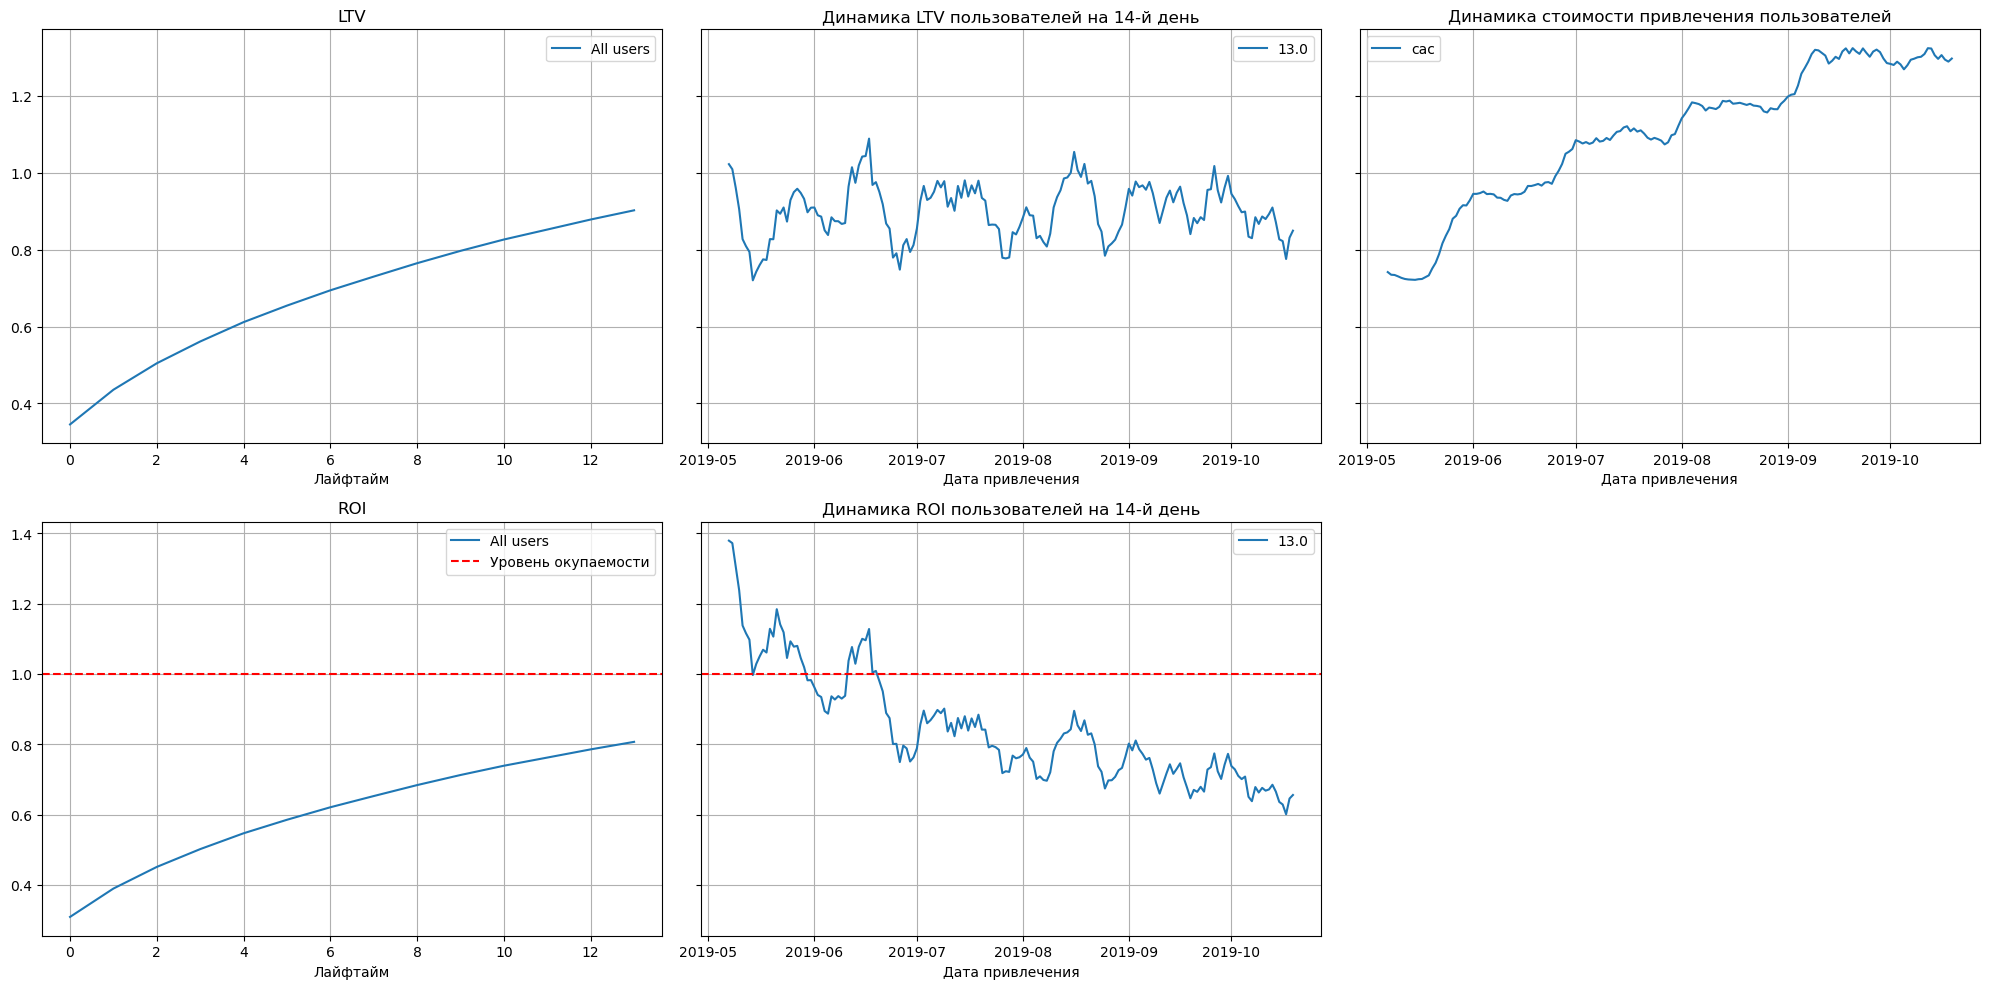

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles_not_organic, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:
1) Реклама не окупается, ROI на 14 день составляет около 80%.
2) CAC постепенно увеличивается, то есть компания с каждым днём тратит всё больше денег на рекламу.
3) По графику динамики ROI мы видим, что на 14-ый день пользователи, привлеченные с июля не окупаются.
4) Показатель LTV достаточно стабилен и растёт.

#### Анализ конверсии и удержания пользователей

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

Изучим конверсию с разбивкой по устройствам

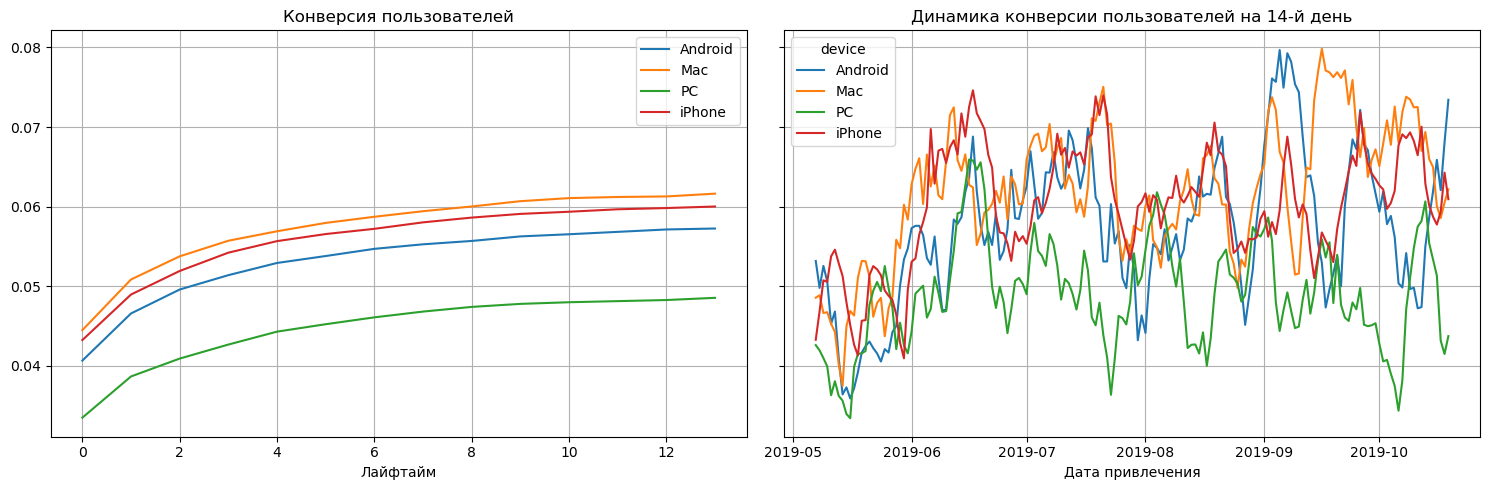

In [48]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия на Mac и iPhone, самая низкая на PC.

Изучим конверсию с разбивкой по странам

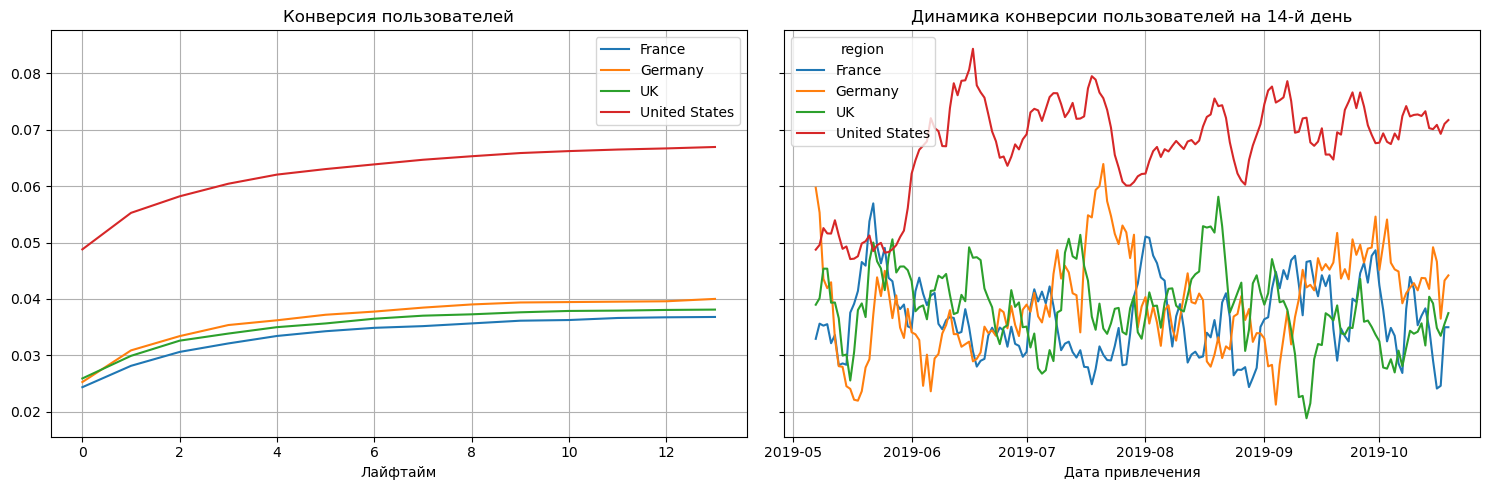

In [49]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия среди стран у США, она почти в 2 раза превышает конверсию в других странах.

Изучим конверсию с разбивкой по каналам

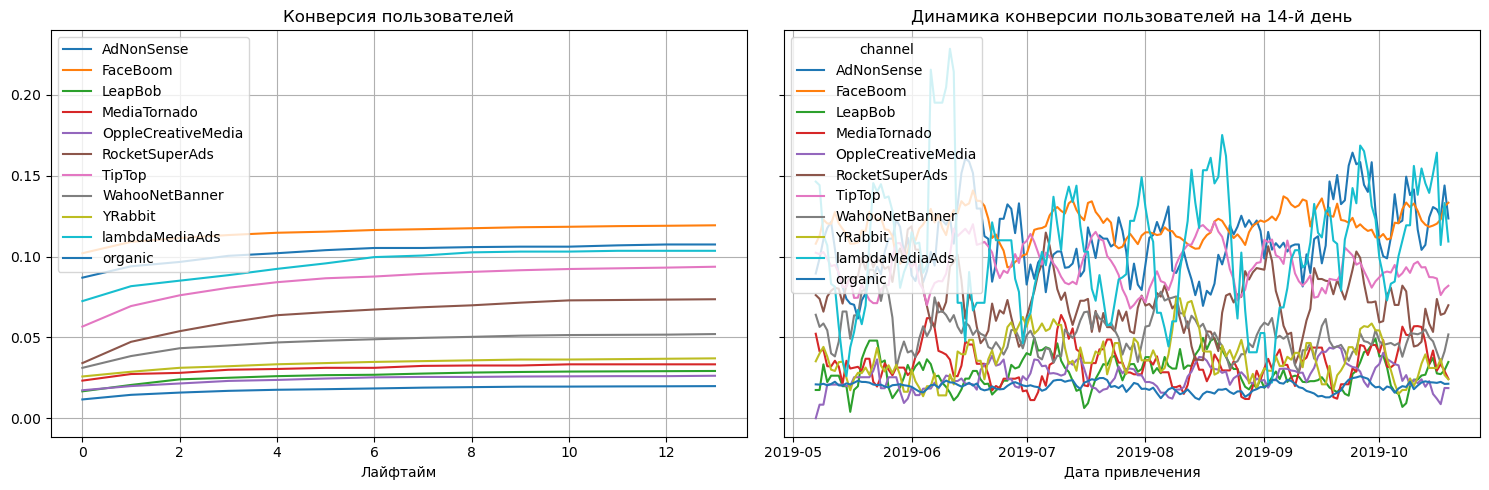

In [50]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у таких каналов продвижения, как FaceBoom, AdNonSense и lambdaMediaAds.
По графику динамики конверсии пользователей на 14-ый день, мы видим, что самая высокая конверсия на 14-ый день у пользователей, привлеченных из lambdaMediaAds в августе,конце сентября и начале октября. 

Изучим удержание с разбивкой по устройствам

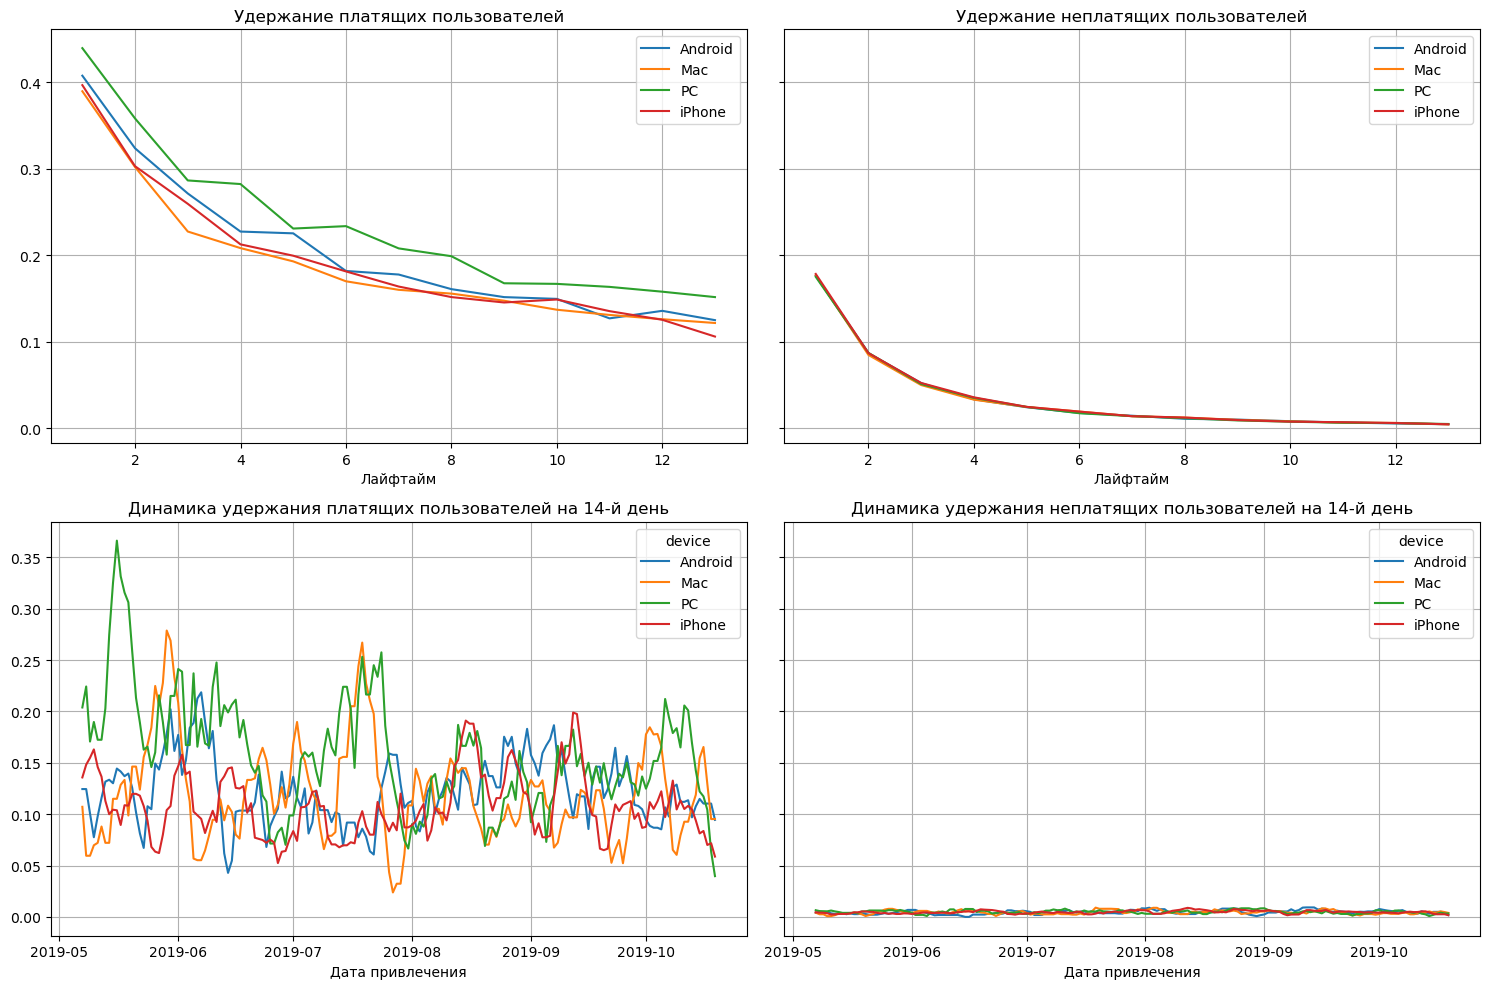

In [51]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лучшие показатели удержания пользователей показывают такие устройства, как Android и PC. Если сравнивать платящих и неплатящих пользователей, то удержание платящих пользователей намного выше. По графику динамики удержания платящих пользоваталей на 14-ый день мы видим, что лучше всего удерживаются пользователи, использующие PC, особенно высокими являются эти показатели для пользователей, привлеченных в мае, далее динамика удержания постепенно становится примерно одинаковой на всех утсройствах.

Изучим удержание с разбивкой по странам

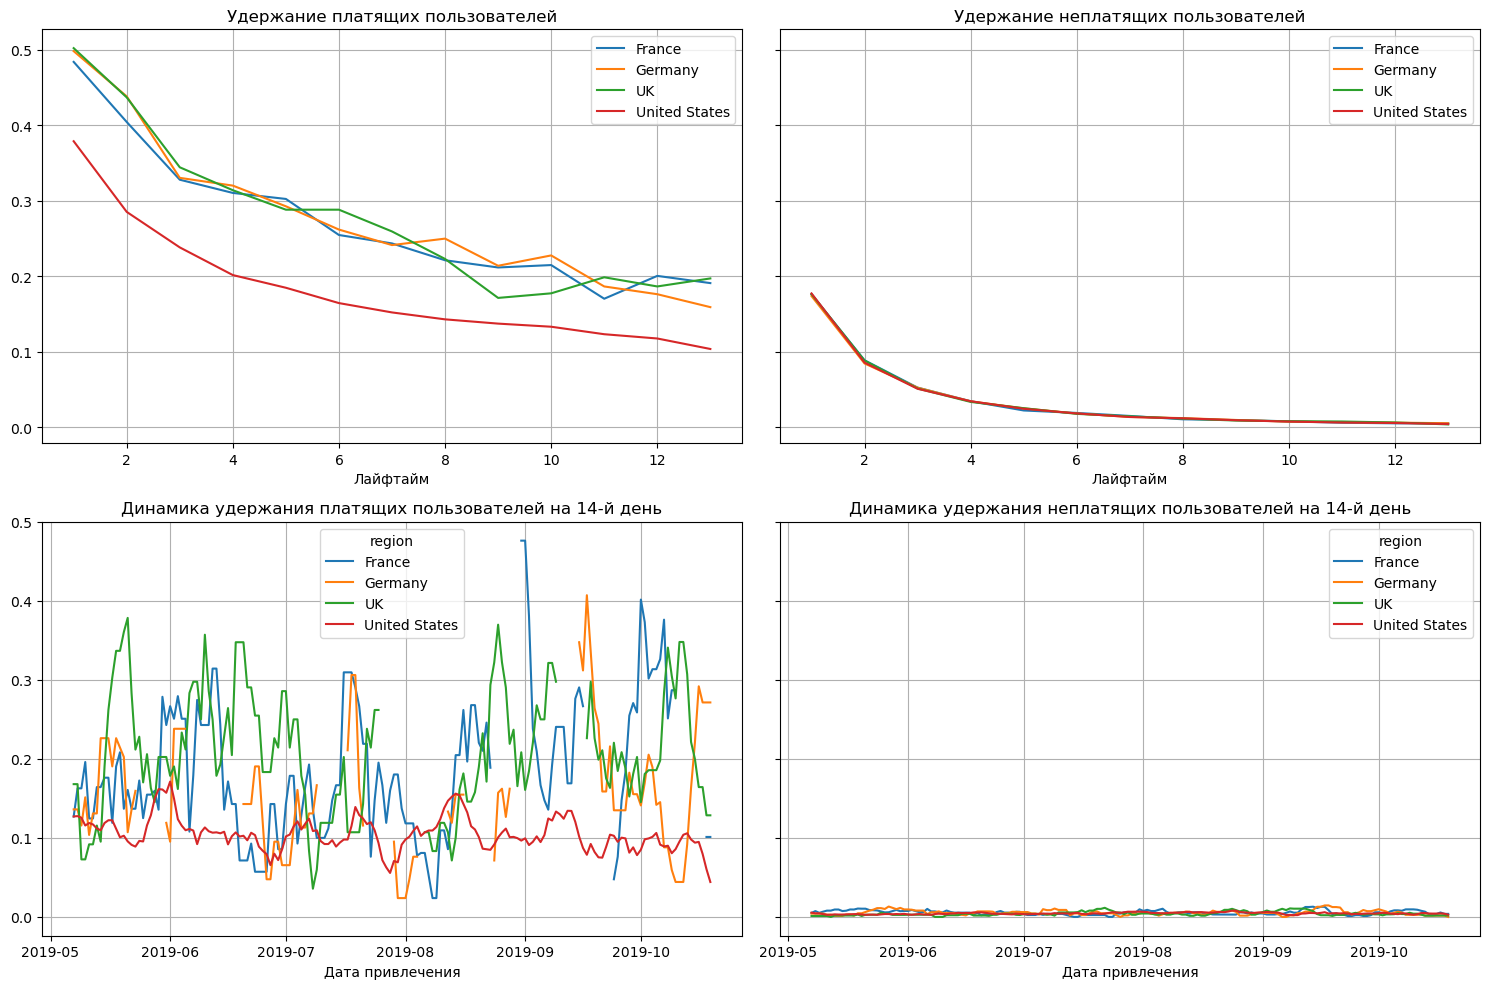

In [52]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В разбивке по странам самые худшие показатели удержания у США. У остальных стран они примерно на одном уровне. Удержание платящих пользователей выше, чем неплатящих. По графику динамики удержания пользователей на 14-ый день мы видим довольно высокие показатели у пользователей из Франции, особенно у тех, кто был привлечен в сентябре и октябре.

Изучим удержание с разбивкой по каналам

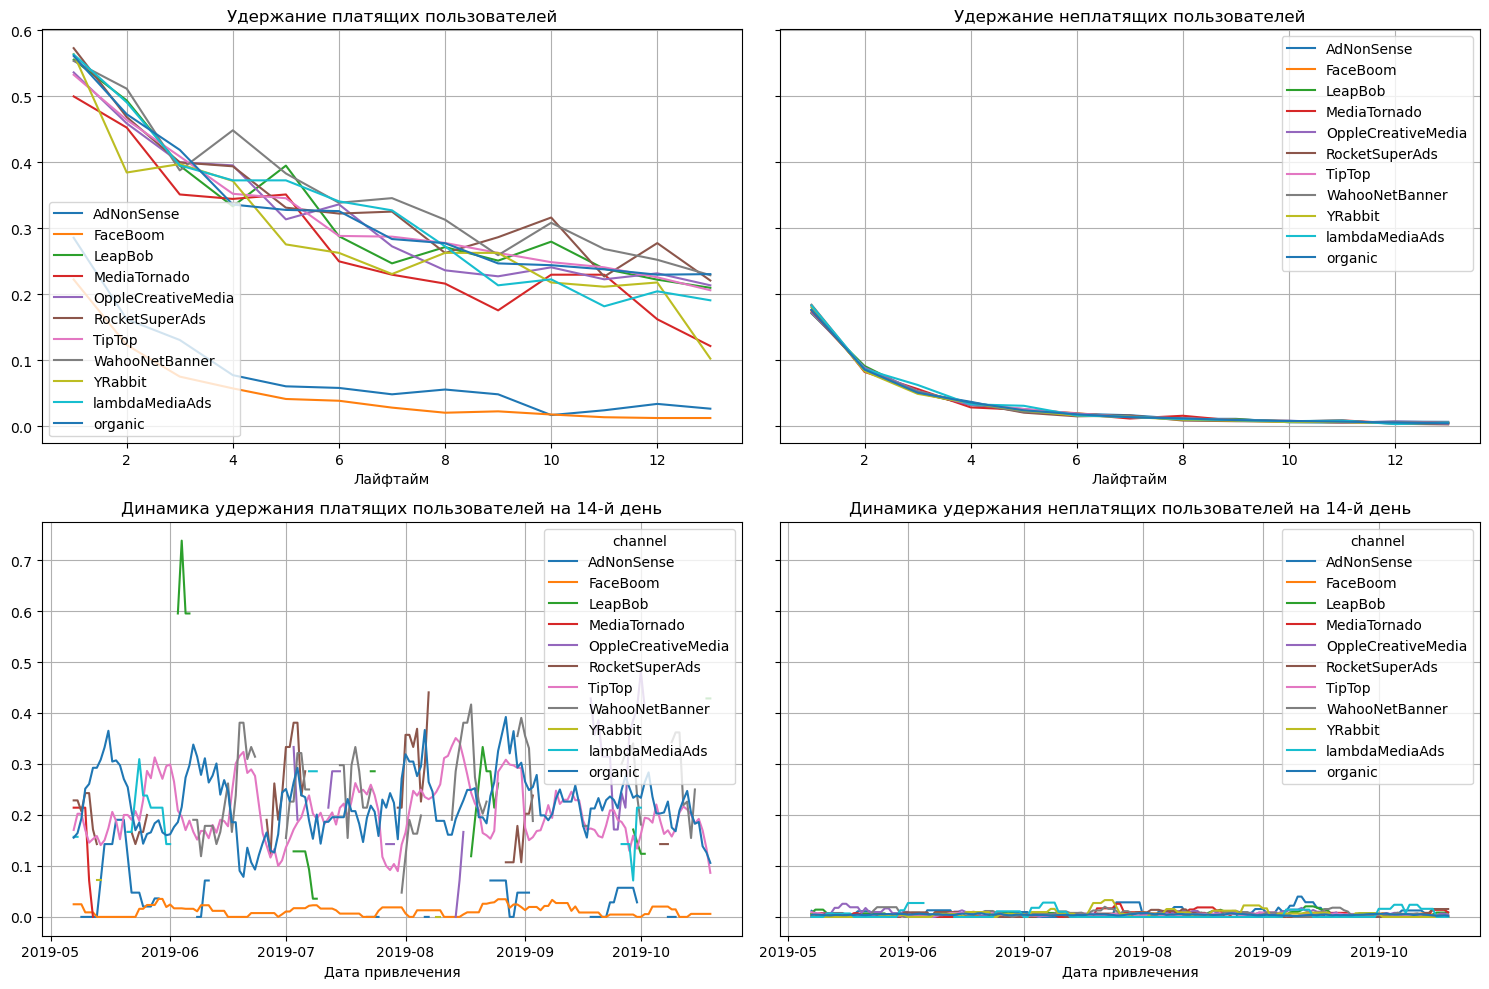

In [53]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В разбивке по каналам привлечения худшие показатели удержания у AdNonSense и FaceBoom. Удержание платящих пользователей выше, чем неплатящих. По графику динамики удержания платящих пользователей на 14-ый день мы можем сделать вывод, что самый низкий уровень удержания у пользователей из канала FaceBoom, этот показатель остается низким во все месяцы привлечения. 

#### Анализ окупаемости рекламы с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

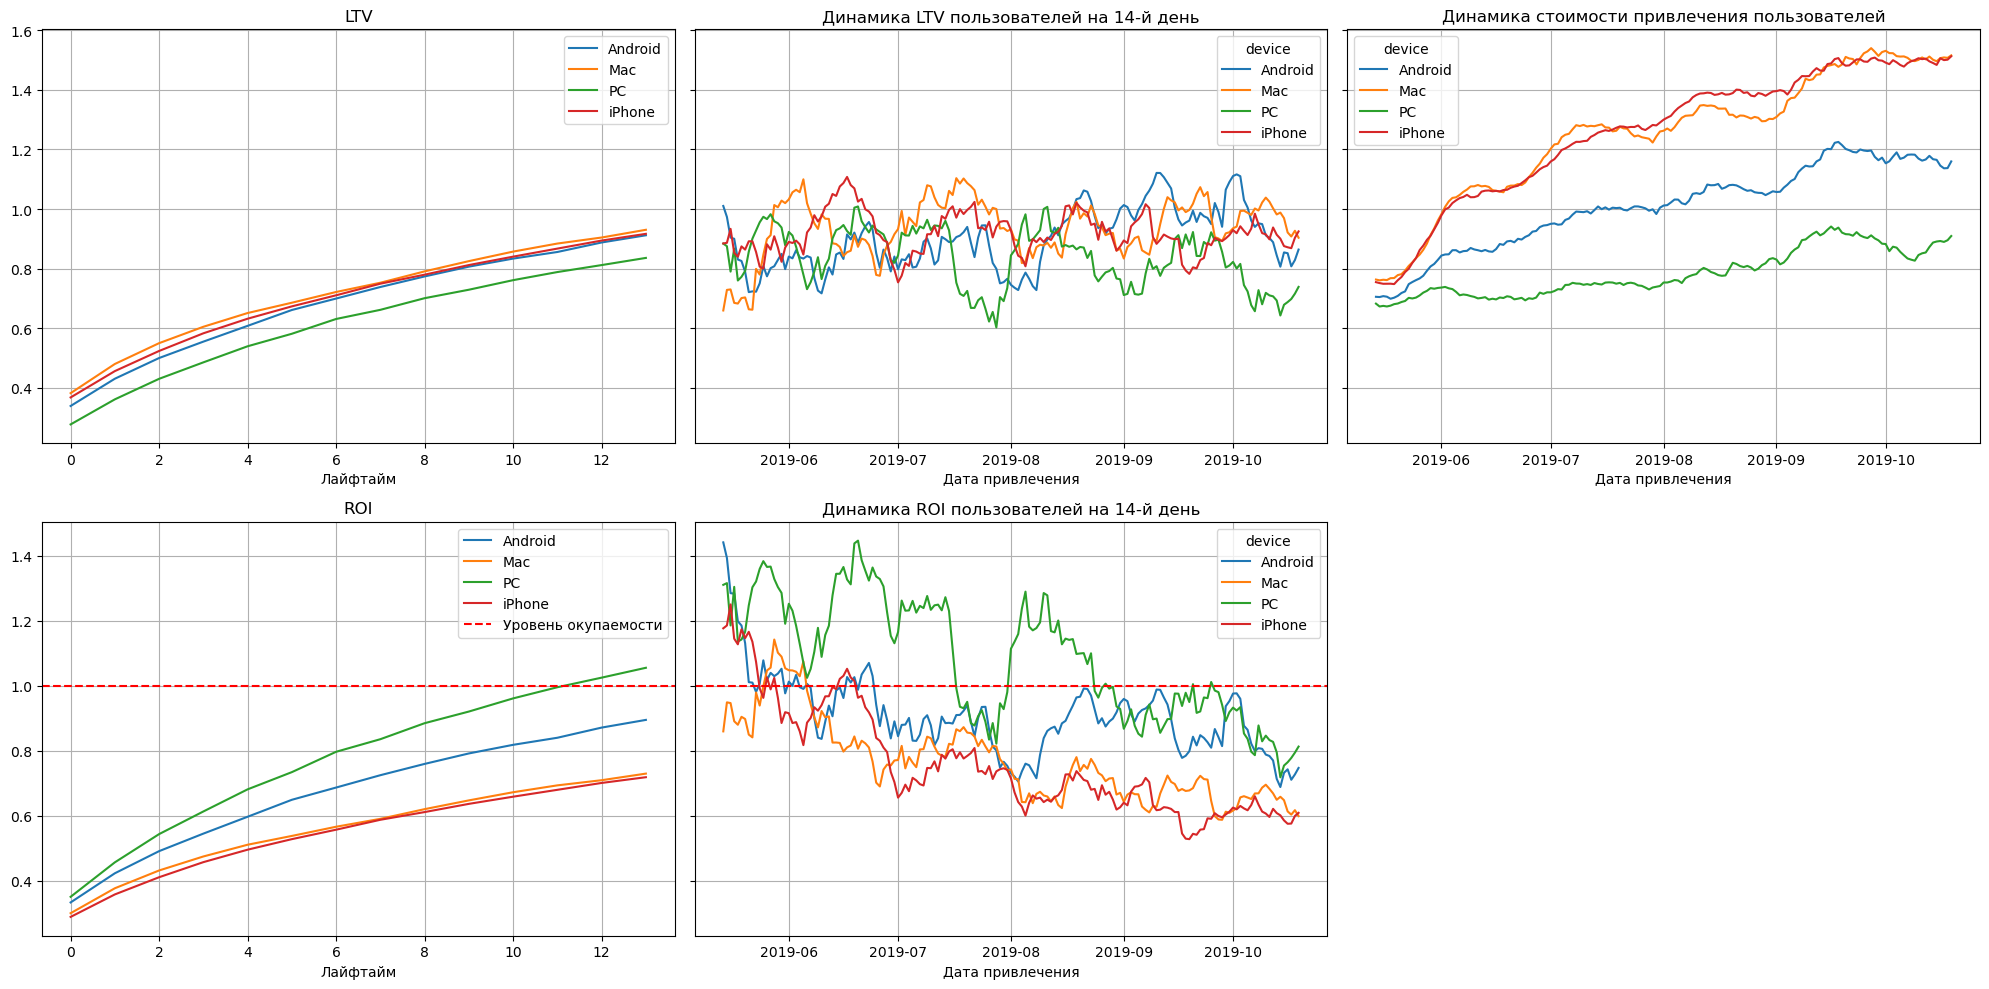

In [54]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Окупаются только владельцы PC, у владельцев Mac и iPhone показатель ROI очень низкий, это значит, что они совершенно не окупаются. При этом стоимость привлечения пользователей (CAC) выше для Mac и iPhone.

#### Анализ окупаемости рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

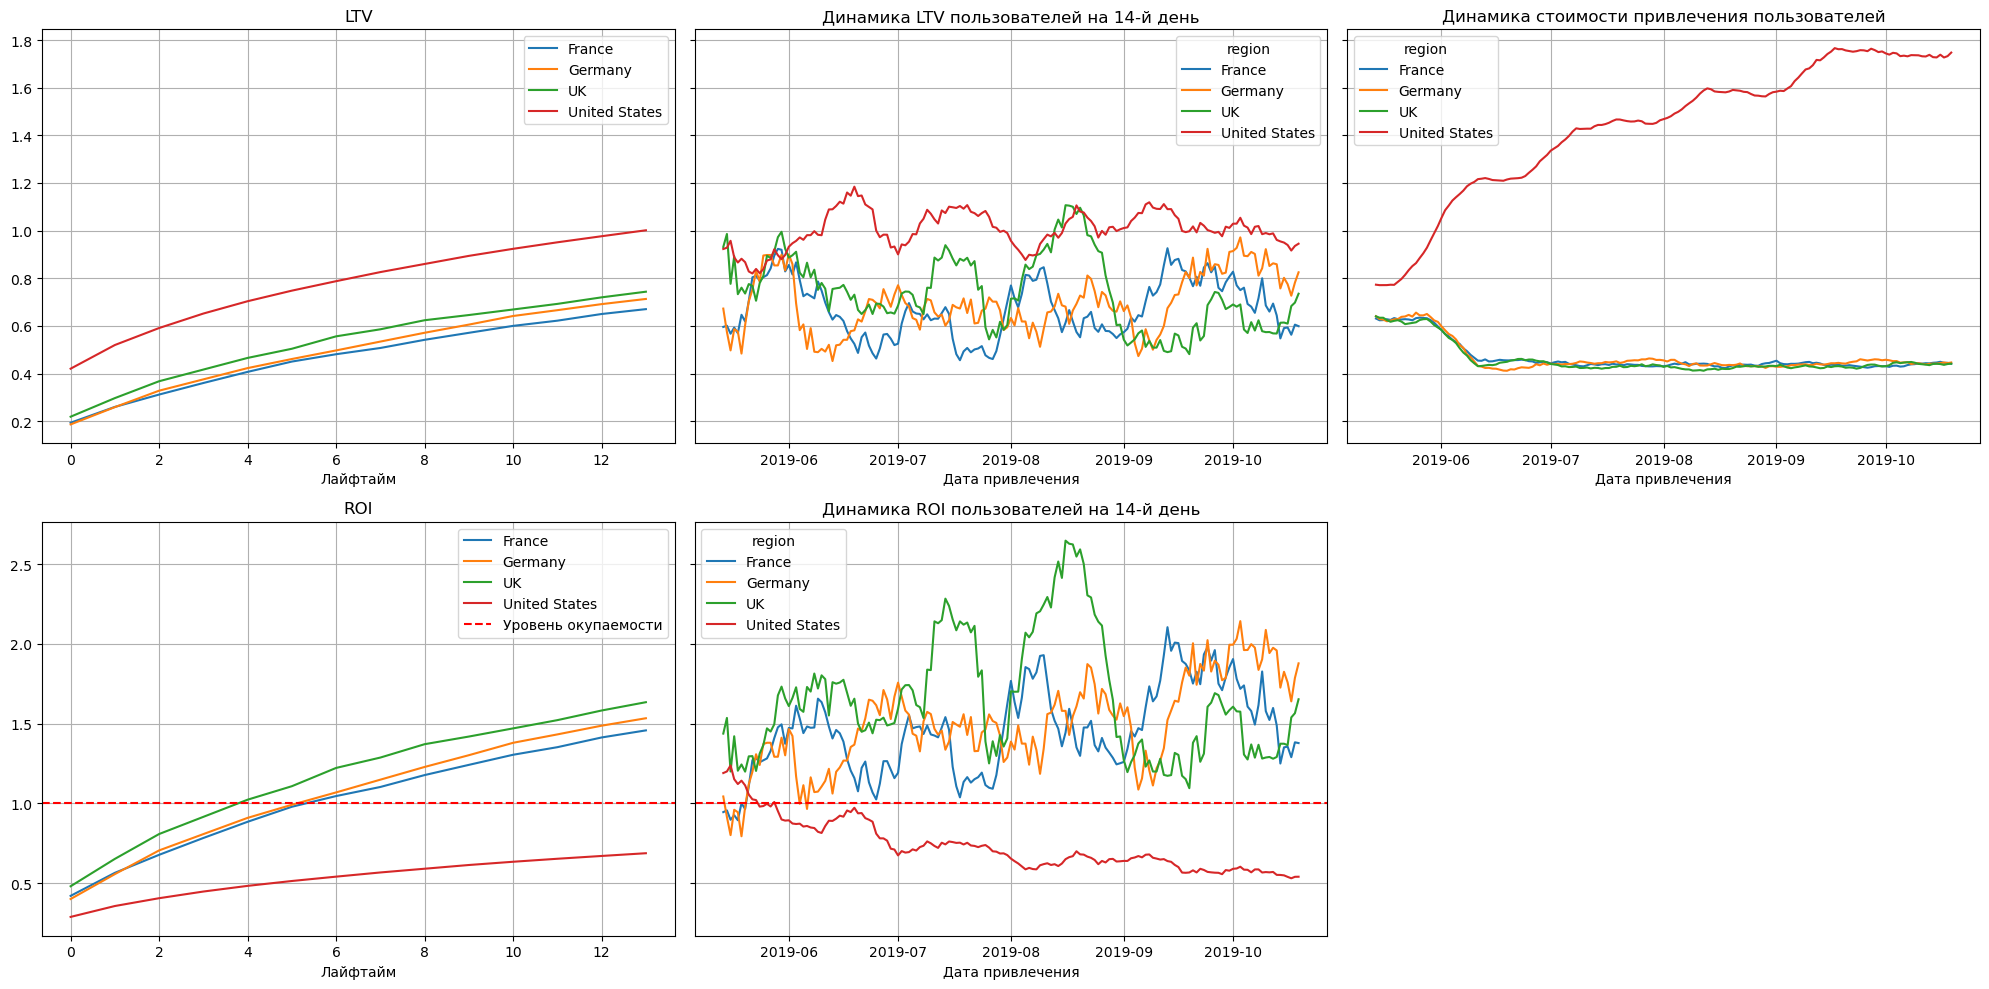

In [55]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам с разбивкой по странам мы увидели, что реклама окупается очень хорошо во всех странах, кроме США, при этом стоимость привлечения пользователей (CAC) из США намного выше, чем из других стран. Самый высокий LTV в США, в остальных странах он примерно на одном уровне. По графику динамики ROI пользователей на 14-ый день мы можем сделать вывод, что ситуация с окупаемостью в США постепенно ухудшается с каждым месяцем, показатели становятся всё ниже.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

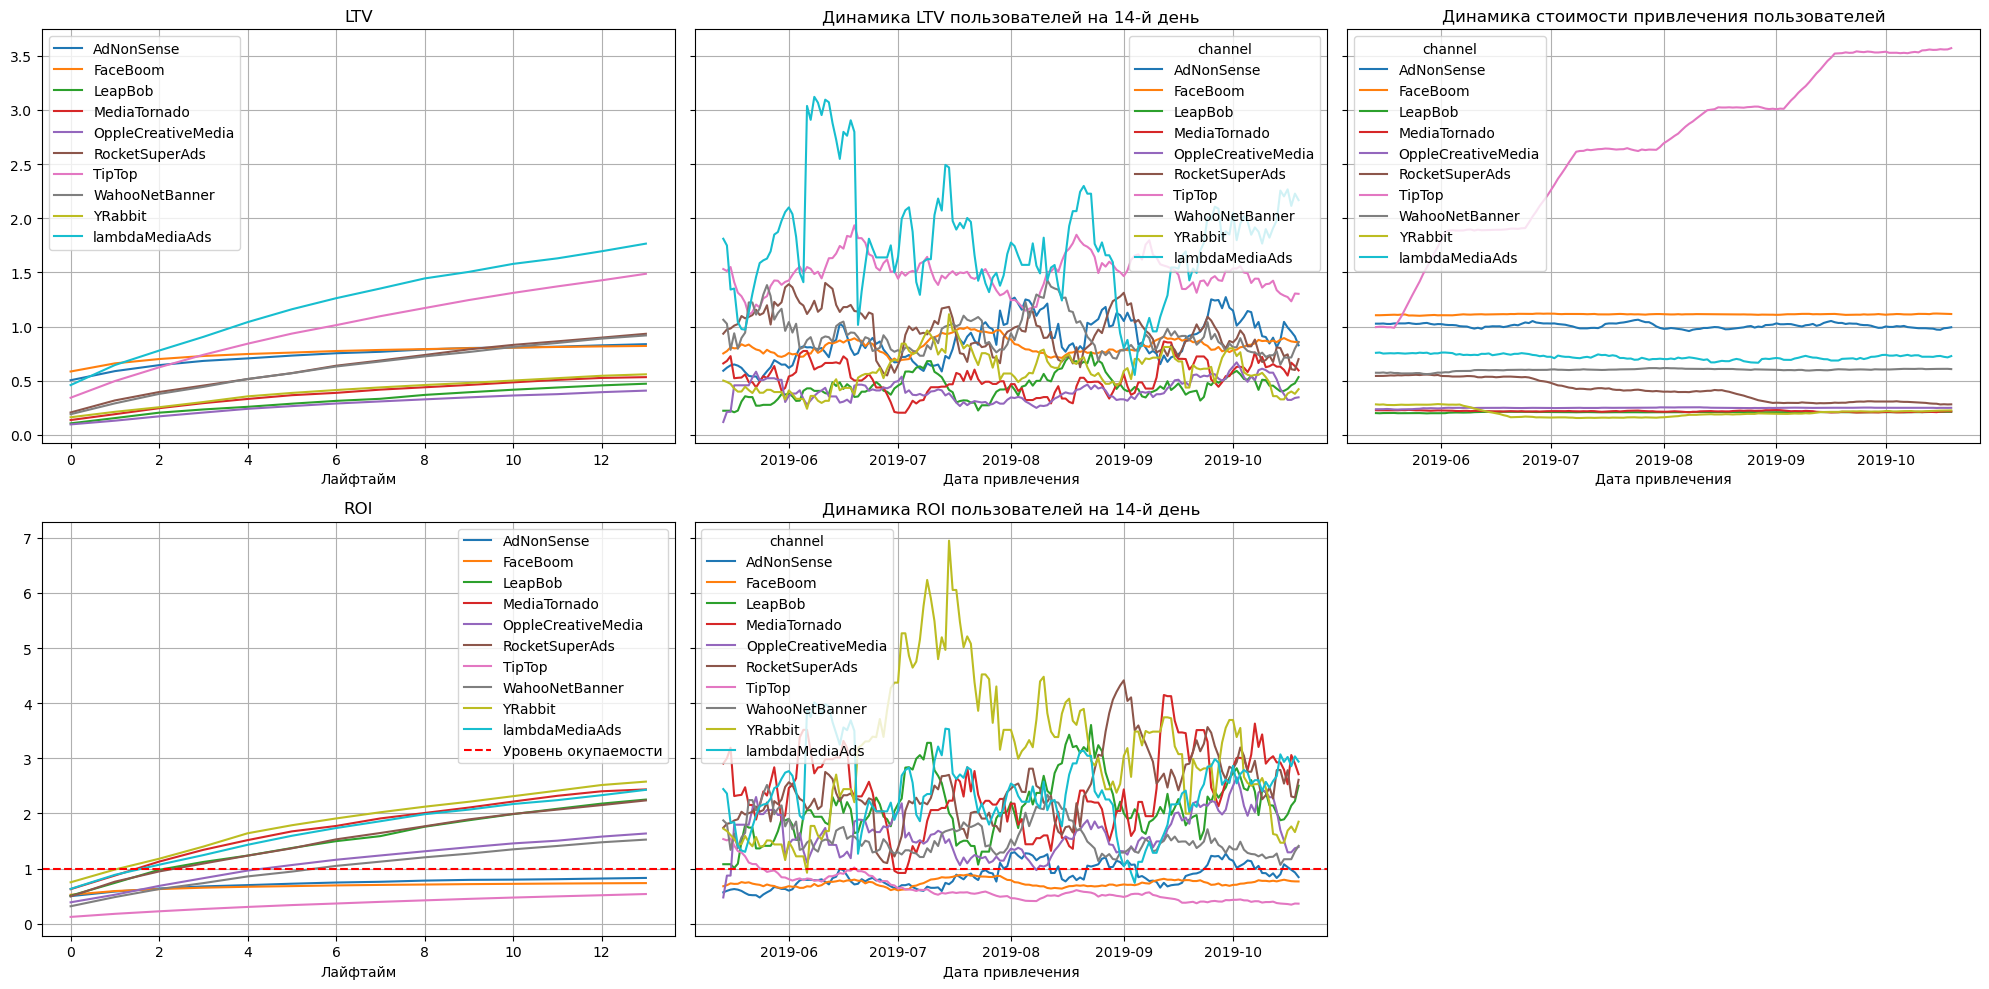

In [56]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам с разбивкой по каналам привлечения мы обнаружили, что окупаются все источники, кроме TipTop, AdNonSense и FaceBoom, при этом у TipTop намного выше стоимость привлечения пользователей, чем в других каналах. При этом самый высокий LTV у пользователей, привлеченных из таких источников, как TipTop и LambdaMediaAds. 
На графике динамики ROI пользователей на 14-ый день мы видим, что самый высокий ROI на 14-ый день у пользователей, привлеченных из YRabbit в июле, а самый низкий - у пользователей, привлеченных из TipTop и FaceBoom, эти показатели ниже окупаемости каждый месяц.

Выводы по анализу окупаемости рекламы:
1. Реклама не окупается, ROI на 14 день составляет около 80%.
2. Негативное влияние могут оказывать такие устройства, как Mac и iPhone; такие страны, как США и такие каналы привлечения, как TipTop, AdNonSense и FaceBoom.
3. Проблемы окупаемости могут быть вызваны, тем, что на Mac и iPhone происходит какая-то техническая ошибка. Мы видим, что именно у данных устройств самые низкие показатели удержания. В разбивке по странам мы обнаружили, что в США очень низкое удержание. Мы предполагаем, что эти два фактора могут быть связаны, ведь согласно доступной статистике в США большая доля рынка приходится именно на эти устройства. Стоимость привлечения пользователя из США самая высокая, при этом новые пользователи не долго задерживаются в приложении, отсюда и возникают проблемы с окупаемостью.
Что касается каналов привлечения, то здесь мы можем выделить TipTop, так как он совершенно не окупается, при том, что на нём очень высокая стоимость привлечения пользователя. Мы предполагаем, что он не окупается из-за невысокой конверсии, она не перекрывает расходы на рекламу. Это может быть связано с тем, что из данного канала приходит не целевая или не платежеспособная аудитория.
4. Для решения обнаруженных проблем, мы рекомендуем проверить наличие технических ошибок на таких устройствах, как Mac и iPhone. Также мы рекомендуем снизить расходы на рекламу в США и сосредоточиться на других странах, если после обнаружения и исправления технических ошибок на Mac и iPhone, окупаемость в США останется на такое же низком уровне. Также мы рекомендуем, обратить внимание на такие каналы продвижения, как YRabbit и MediaTornado, так как на них довольно низкая стоимость привлечения пользователя, высокое удержание, и как результат высокие показатели окупаемости. Мы советуем отказаться от такого канала продвижения, как TipTop, так как на нем очень высокая стоимость привлечения пользователя, но низкая конверсия, как следствие, он совершенно не окупается.

### Общий вывод

В данном проекте мы работали с входными данными о маркетинговой стратегии компании развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача заключалась в выявлении причин, а также в составлении рекомендаций, которые помогут компании выйти в плюс.

На этапе предобработки мы подготовили данные для анализа, а именно изменили типы данных в тех столбцах, где типы данных не соответствовали представленным в них значениям, привели названия столбцов к нижнему регистру и к snake_case, проверили данные на наличие пропусков и дубликатов.

После этого мы задали функции для создания профилей пользователей, для подсчета Retention Rate, для подсчета конверсии, для подсчета LTV, для сглаживания данных, для построения графика Retention Rate, для построения графика конверсии, для визуализации LTV и ROI.

Далее нами был проведен исследовательский анализ данных, в ходе которого мы:

1. Составили профили пользователей, выявили минимальную (5 мая 2019) и максимальную дату (27 октября 2019) привлечения пользователей.

2. Исследовали страны, из которых пользователи приходят в приложение и на какую страну  приходится больше всего платящих пользователей. Пользователи приходят из 4 стран: Франции, Германии, Великобритании и США. Большего всего платящих пользователей приходится на США - 6.9%

3. Исследовали устройства, с которых пользователи используют приложение и какие устройства предпочитают платящие пользователи.
Клиенты пользуются такими устройствами, как Android, Mac, PC, iPhone. По количеству пользователей преобладают iPhone и Android, однако доля платящих пользователей выше всего на Mac и iPhone.

4. Исследовали каналы привлечения, из которых приходят пользователи, и определили каналы, из которых пришло больше всего платящих пользователей.
Больше всего платящих пользователей пришло из таких каналов, как FaceBoom и TipTop. Самая высокая доля платящих пользователей пришла из таких каналов, как FaceBoom, AdNonSense и lambdaMediaAds. На TipTop доля платящих пользователей меньше, чем на выше упомянутых.

Затем мы исследовали маркетинг компании:

1. Расчитали общую сумму расходов на маркетиг. Она составила 105497$.

2. Изучили распределение трат по рекламным источникам.
Больше всего денег потрачено на такие источники, как TipTop и FaceBoom.

3. Выявили среднюю стоимость привлечения одного пользователя.Самая высокая средняя стоимость привлечения одного пользователя (CAC) из TipTop (2.8$).

Далее мы оценили окупаемость рекламы и пришли к следующим выводам:

1. Реклама не окупается, ROI на 14 день составляет около 80%.

2. Негативное влияние на окупаемость могут оказывать такие устройства, как Mac и iPhone; такие страны, как США и такие каналы привлечения, как TipTop, AdNonSense и FaceBoom.

3. Проблемы окупаемости могут быть вызваны, тем, что на Mac и iPhone происходит какая-то техническая ошибка. Мы видим, что именно у данных устройств самые низкие показатели удержания. В разбивке по странам мы обнаружили, что в США очень низкое удержание. Мы предполагаем, что эти два фактора могут быть связаны, ведь согласно доступной статистике в США большая доля рынка приходится именно на эти устройства. Стоимость привлечения пользователя из США самая высокая, при этом новые пользователи не долго задерживаются в приложении, отсюда и возникают проблемы с окупаемостью. 

4. Что касается каналов привлечения, то здесь мы можем выделить TipTop, так как он совершенно не окупается, при том, что на нём очень высокая стоимость привлечения пользователя. Мы предполагаем, что он не окупается из-за невысокой конверсии, она не перекрывает расходы на рекламу. Это может быть связано с тем, что из данного канала приходит не целевая аудитория.

По итогам исследования мы подготовили следующие рекомендации для отдела маркетинга:

1. Для решения обнаруженных проблем, мы рекомендуем проверить наличие технических ошибок на таких устройствах, как Mac и iPhone. Возможно, возникают проблемы при использовании приложения, так как удержание на этих устройствах довольно низкое. С этим может быть связана не окупаемость рекламы в США, так как именно американцы чаще всего используют эти устройства.

2. Также мы рекомендуем перераспределить деньги на другие источники привлечения для пользователей из США. TipTop самый невыгодный канал для привлечения, так как он совершенно не окупается, на нём очень высокий CAC и низкий ROI. Стоит обратить внимание на другие каналы привлечения для пользователей из США, такие как YRabbit и MediaTornado, так как на них довольно низкая стоимость привлечения пользователя, высокое удержание, и как результат высокие показатели окупаемости.

3. Для пользователей из Европейских стран необходимо искать новые каналы привлечения, также стоит обратить особое внимание на пользователей PC, увеличить бюджет на их привлечение, так как реклама для них окупается, у них самые высокие показатели удержания, но низкая конверсия. Возможно, стоит поработать над рекламой, чтобы пользователи PC лучше конвертировались в платящих.